In [3]:
import _thread
import time
import os
import sys
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

In [4]:
def prediction(image_path):

    image_data = tf.gfile.FastGFile(image_path, 'rb').read()
    #-1: Não e um veículo,
    # 0: Veículo não danificado 
    # 1: Veículo pouco danificado
    # 2: Veículo muito danificado
    label_lines = ['-1','0','2','1'] 

    with tf.gfile.FastGFile(r"./models/tf_files/retrained_graph.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

    with tf.Session() as sess:
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
        predictions = sess.run(softmax_tensor, \
                 {'DecodeJpeg/contents:0': image_data})
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
        for node_id in top_k:
            count = 1
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            count += 1
            score = (round((score * 100), 2))
            return human_string,score

In [5]:
def predict(image_path):
  
    image = cv2.imread(image_path)
    plt.imshow(image)
    plt.title(image_path)
    plt.show()
    
    with tf.Graph().as_default():
        human_string, score= prediction(image_path)
    print('Acurácia: ' + str(score))
    if (human_string == '-1'):
        label_text = 'Imagem não corresponde a um veículo'
    elif (human_string == '0'):
        label_text = 'Veículo não Danificado.'
    elif (human_string == '1'):
        label_text = 'Veículo pouco danificado.'
    elif (human_string == '2'):
        label_text = 'Veículo muito danificado.'
    print(label_text)

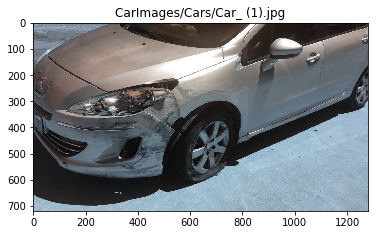

Acurácia: 74.18
Veículo pouco danificado.


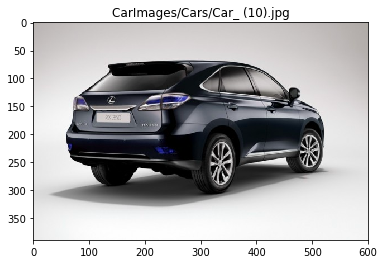

Acurácia: 97.04
Veículo não Danificado.


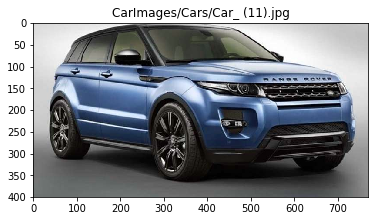

Acurácia: 69.95
Veículo não Danificado.


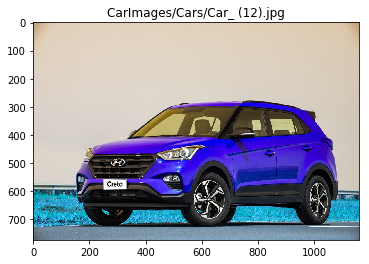

Acurácia: 93.33
Veículo não Danificado.


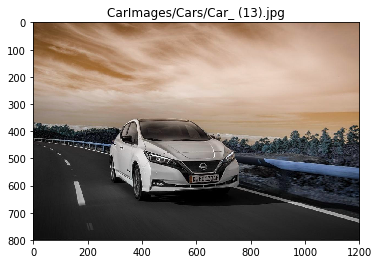

Acurácia: 43.87
Veículo não Danificado.


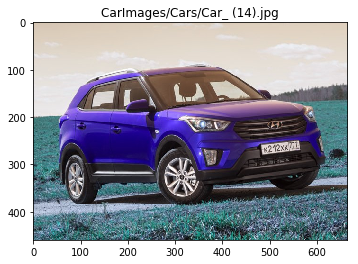

Acurácia: 61.68
Veículo não Danificado.


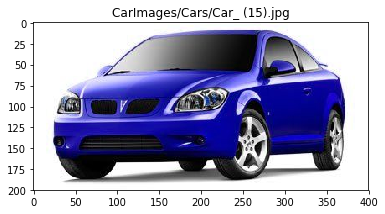

Acurácia: 85.3
Veículo não Danificado.


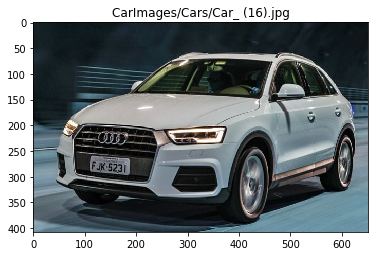

Acurácia: 83.22
Veículo não Danificado.


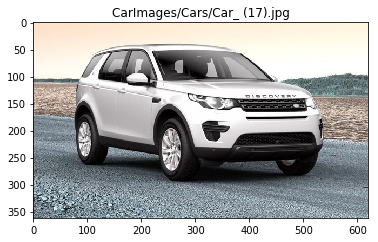

Acurácia: 73.43
Veículo não Danificado.


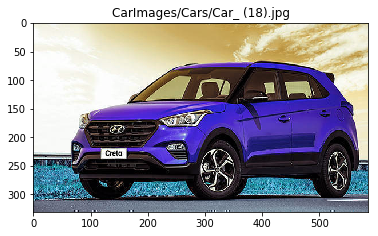

Acurácia: 92.29
Veículo não Danificado.


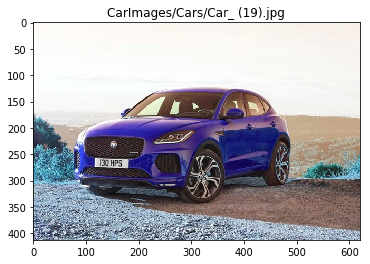

Acurácia: 96.53
Veículo não Danificado.


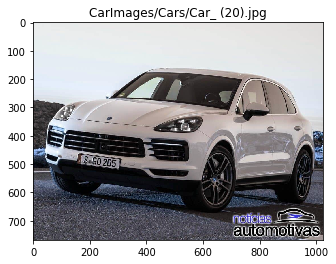

Acurácia: 84.49
Veículo não Danificado.


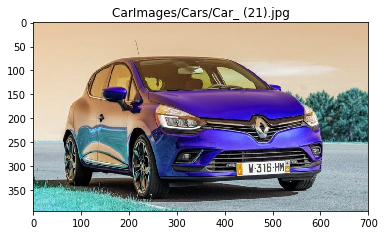

Acurácia: 96.54
Veículo não Danificado.


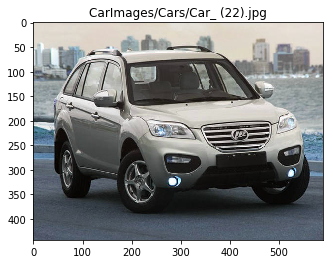

Acurácia: 74.3
Veículo não Danificado.


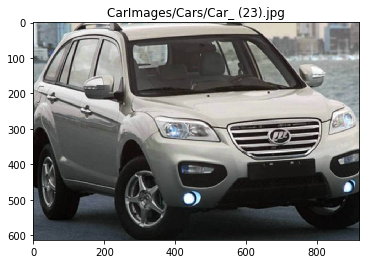

Acurácia: 34.57
Veículo muito danificado.


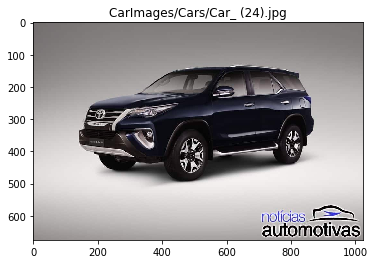

Acurácia: 92.9
Veículo não Danificado.


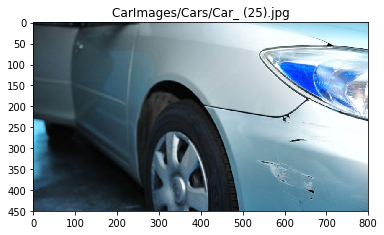

Acurácia: 81.5
Veículo pouco danificado.


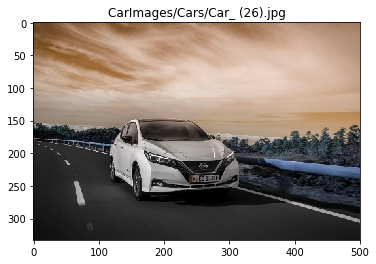

Acurácia: 44.47
Veículo pouco danificado.


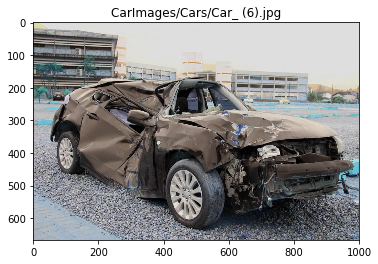

Acurácia: 66.8
Veículo muito danificado.


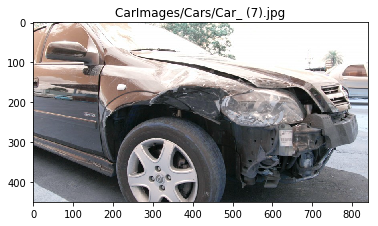

Acurácia: 66.79
Veículo muito danificado.


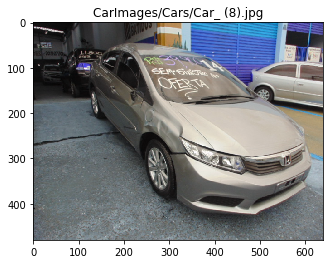

Acurácia: 70.03
Veículo pouco danificado.


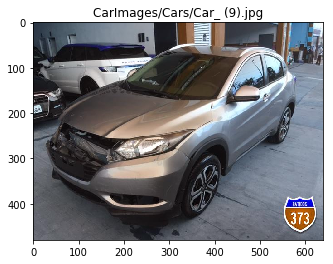

Acurácia: 47.24
Veículo pouco danificado.


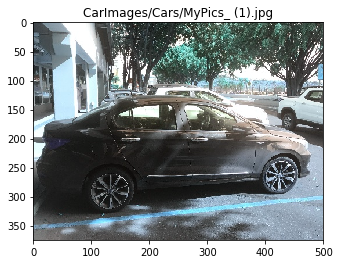

Acurácia: 43.71
Veículo pouco danificado.


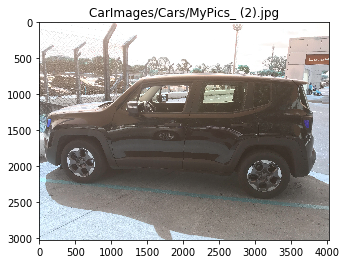

Acurácia: 46.8
Veículo não Danificado.


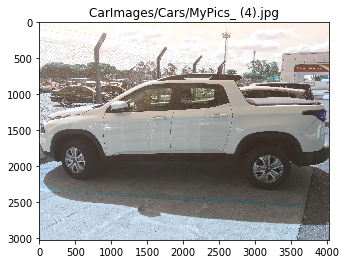

Acurácia: 77.19
Veículo muito danificado.


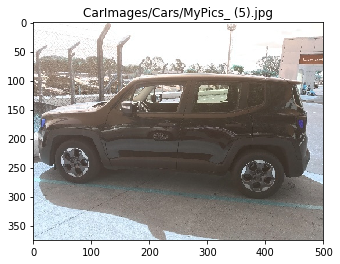

Acurácia: 48.23
Veículo não Danificado.


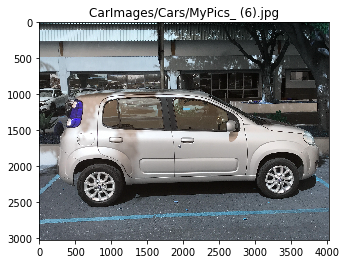

Acurácia: 59.73
Veículo não Danificado.


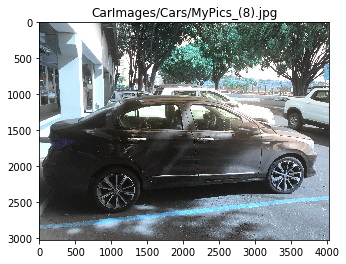

Acurácia: 47.81
Veículo não Danificado.


In [6]:
carsImageList = os.listdir('CarImages/Cars/')
for eachCarImage in carsImageList:
    predict('CarImages/Cars/{}'.format(eachCarImage))

In [21]:
#Analisar as duas imagens Similares
simylarCars = ['CarImages/Cars/MyPics_(1).jpg','CarImages/Cars/MyPics_(8).jpg']

In [22]:
image_01 = cv2.imread(simylarCars[0],0)
image_02 = cv2.imread(simylarCars[1],0)

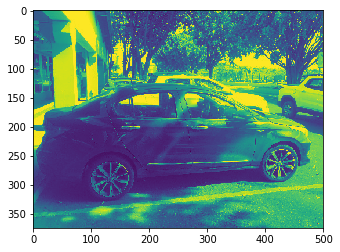

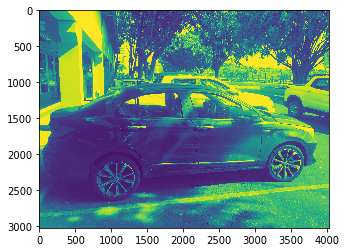

In [24]:
plt.imshow(image_01)
plt.show()
plt.imshow(image_02)
plt.show()

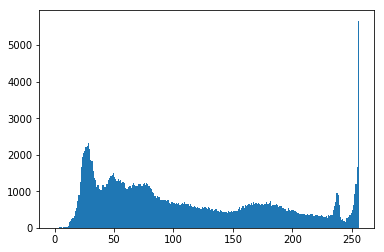

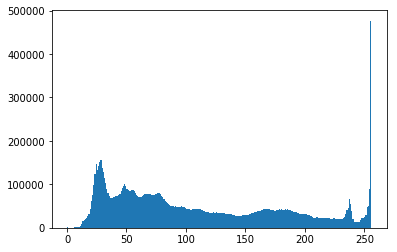

In [26]:
plt.hist(image_01.ravel(),256,[0,256]); plt.show()
plt.hist(image_02.ravel(),256,[0,256]); plt.show()
